In [1]:
import pandas as pd
import numpy as np

In [2]:
apple = pd.read_csv('apple.csv',index_col='Date', parse_dates=True)
msft = pd.read_csv('msft.csv', index_col='Date', parse_dates=True)

In [3]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1425 entries, 2015-12-31 to 2021-08-27
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1425 non-null   float64
 1   High       1425 non-null   float64
 2   Low        1425 non-null   float64
 3   Close      1425 non-null   float64
 4   Adj Close  1425 non-null   float64
 5   Volume     1425 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 77.9 KB


In [4]:
apple.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-12-31,26.752501,26.757500,26.205000,26.315001,24.266081,163649200
2016-01-04,25.652500,26.342501,25.500000,26.337500,24.286833,270597600
2016-01-05,26.437500,26.462500,25.602501,25.677500,23.678219,223164000
2016-01-06,25.139999,25.592501,24.967501,25.174999,23.214844,273829600
2016-01-07,24.670000,25.032499,24.107500,24.112499,22.235069,324377600


In [5]:
#Compute daily returns
apple['Daily Returns'] = apple['Adj Close'].pct_change(1)
msft['Daily Returns'] = msft['Adj Close'].pct_change(1)

In [6]:
apple.head()

,Open,High,Low,Close,Adj Close,Volume,Daily Returns
Date,,,,,,,
2015-12-31,26.752501,26.757500,26.205000,26.315001,24.266081,163649200,NaN
2016-01-04,25.652500,26.342501,25.500000,26.337500,24.286833,270597600,0.000855
2016-01-05,26.437500,26.462500,25.602501,25.677500,23.678219,223164000,-0.025059
2016-01-06,25.139999,25.592501,24.967501,25.174999,23.214844,273829600,-0.019570
2016-01-07,24.670000,25.032499,24.107500,24.112499,22.235069,324377600,-0.042205


In [7]:
#Delete the NaN values because they will be problematic with future calcualtions
apple = apple.dropna()
msft = msft.dropna()

In [8]:
apple.head()

,Open,High,Low,Close,Adj Close,Volume,Daily Returns
Date,,,,,,,
2016-01-04,25.652500,26.342501,25.500000,26.337500,24.286833,270597600,0.000855
2016-01-05,26.437500,26.462500,25.602501,25.677500,23.678219,223164000,-0.025059
2016-01-06,25.139999,25.592501,24.967501,25.174999,23.214844,273829600,-0.019570
2016-01-07,24.670000,25.032499,24.107500,24.112499,22.235069,324377600,-0.042205
2016-01-08,24.637501,24.777500,24.190001,24.240000,22.352642,283192000,0.005288


In [9]:
apple['Daily Returns'].std()

0.018700009230664717

In [10]:
msft['Daily Returns'].std()

0.017014492907230318

Function for Sharpe Ratio:
Calculate Mean,
Compute STD,
Calculate Sharpe Ratio

In [11]:
def compute_sharpe_ratio (data, risk_free_rate=0):
    mean_return = data['Daily Returns'].mean()
    std = data['Daily Returns'].std()

    sharpe_ratio = (mean_return-risk_free_rate)/std

    return sharpe_ratio

In [12]:
apple_sharpe_ratio = compute_sharpe_ratio(apple)
apple_sharpe_ratio

0.07745264297924775

In [13]:
msft_sharpe_ratio = compute_sharpe_ratio(msft)
msft_sharpe_ratio

0.08222277302779334

In [14]:
#Annual Sharpe Ratio, we are using 252 becuase that is amount of trading days in the year.
annual_sharpe_ratio_apple = apple_sharpe_ratio * np.sqrt(252)
annual_sharpe_ratio_apple

1.2295225902465745

In [15]:
annual_sharpe_ratio_msft = msft_sharpe_ratio * np.sqrt(252)
annual_sharpe_ratio_msft

1.3052460572259028

<Axes: xlabel='Date'>

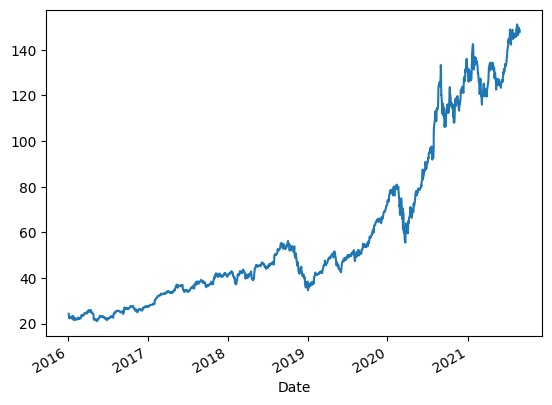

In [16]:
apple['Adj Close'].plot()

<Axes: xlabel='Date'>

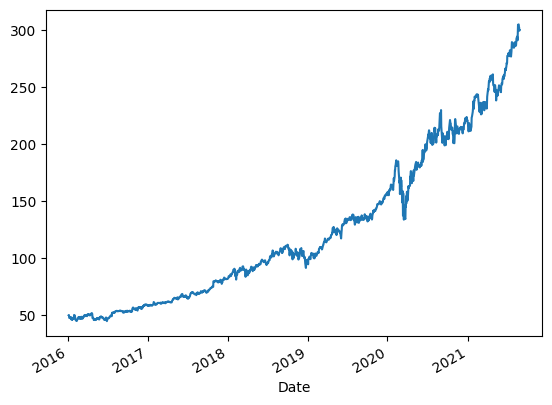

In [17]:
msft['Adj Close'].plot()

Bitcoin Sharpe Ratio

In [18]:
import yfinance as yf
from datetime import datetime
from datetime import date,timedelta

In [19]:
today = date.today()

d1 = today.strftime('%Y-%m-%d')
end_date = d1
d2 = date.today() - timedelta(days=730)
d2 = d2.strftime('%Y-%m-%d')
start_date = d2

In [20]:
bitcoin = yf.download('BTC-USD', start = start_date, end = end_date, progress=False)
bitcoin['Date'] = bitcoin.index
data = bitcoin[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]]
data.reset_index(drop=True, inplace=True)
bitcoin.head()
 

,Open,High,Low,Close,Adj Close,Volume,Date
Date,,,,,,,
2022-03-12,38794.464844,39308.597656,38772.535156,38904.011719,38904.011719,14616450657,2022-03-12
2022-03-13,38884.726562,39209.351562,37728.144531,37849.664062,37849.664062,17300745310,2022-03-13
2022-03-14,37846.316406,39742.500000,37680.734375,39666.753906,39666.753906,24322159070,2022-03-14
2022-03-15,39664.250000,39794.628906,38310.210938,39338.785156,39338.785156,23934000868,2022-03-15
2022-03-16,39335.570312,41465.453125,39022.347656,41143.929688,41143.929688,39616916192,2022-03-16


In [21]:
#Daily returns
bitcoin['Daily Returns'] = bitcoin['Adj Close'].pct_change(1)
bitcoin.head()

,Open,High,Low,Close,Adj Close,Volume,Date,Daily Returns
Date,,,,,,,,
2022-03-12,38794.464844,39308.597656,38772.535156,38904.011719,38904.011719,14616450657,2022-03-12,NaN
2022-03-13,38884.726562,39209.351562,37728.144531,37849.664062,37849.664062,17300745310,2022-03-13,-0.027101
2022-03-14,37846.316406,39742.500000,37680.734375,39666.753906,39666.753906,24322159070,2022-03-14,0.048008
2022-03-15,39664.250000,39794.628906,38310.210938,39338.785156,39338.785156,23934000868,2022-03-15,-0.008268
2022-03-16,39335.570312,41465.453125,39022.347656,41143.929688,41143.929688,39616916192,2022-03-16,0.045887


In [22]:
bitcoin = bitcoin.dropna()

In [23]:
def compute_sharpe_ratio (data,risk_free = 0):
    mean_btc = bitcoin['Daily Returns'].mean()
    std_btc = bitcoin['Daily Returns'].std()
    sharpe_ratio = (mean_btc-risk_free)/std_btc

    return sharpe_ratio

In [24]:
compute_sharpe_ratio(bitcoin)

0.042327328953060746

In [26]:
annual_sharpe_ratio_btc = compute_sharpe_ratio(bitcoin) * np.sqrt(252)
annual_sharpe_ratio_btc

0.671925516428536

<Axes: xlabel='Date'>

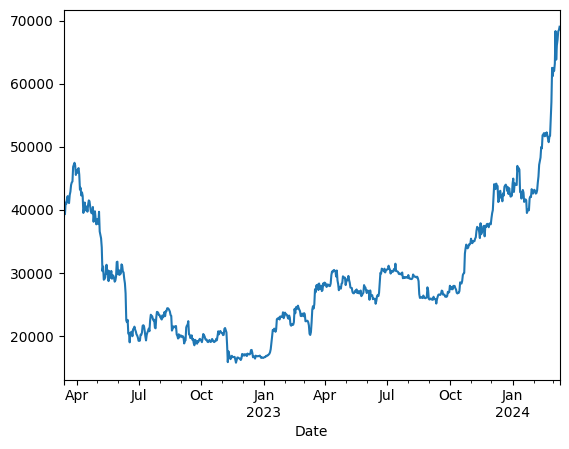

In [27]:
bitcoin['Adj Close'].plot()